# Encuentra los parametros cosmologicos cond datos de supernovas 

In [56]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var', 'random', 'cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [79]:
data = np.loadtxt('jla_mub.txt')
cov_mat = np.loadtxt('jla_mub_covmatrix.dat').T
cov_mat = np.reshape(cov_mat,(-1,31))
invcov = np.linalg.inv(cov_mat)
H0 = 100
c = 3e5

In [80]:
def eta(a, Om):
    s3 = (1-Om)/Om 
    s2 = s3**(2/3)
    s = s3**(1/3)
    return 2*np.sqrt(s3+1)*((1/(a**4))-0.1540*s/(a**3)+0.4304*s2/(a**2)+0.19097*s3/a+(0.06694*s**4))**(-1/8)

def DL(z, H0, Om):
    return (c/H0)*(1+z)*(eta(1, Om)-eta(1/(1+z),Om))

def mu(z,H0,Om):
    return 25-5*np.log10(H0/100)+5*np.log10(DL(z, H0, Om))


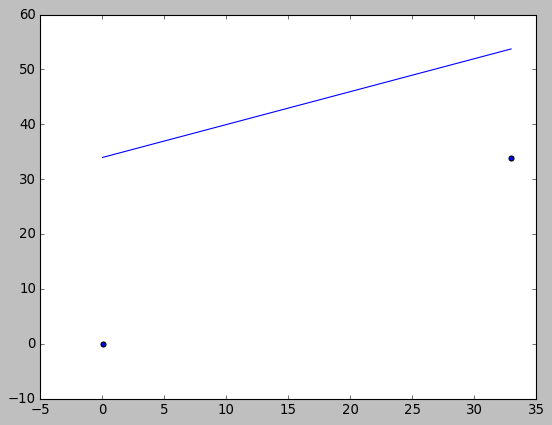

In [81]:
# Graficamos un conjuntp de datos
plot(data[0],mu(data[0],70,0.3))
scatter(data[0], data[1])

In [60]:
def lnlh(theta):
    modelo=mu(data[0], theta[0],theta[1])
    diferencia = data[1]-modelo
    u=0
    u = np.dot(diferencia, invcov)
    u = np.dpt(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u

def Markov(theta1, thetap):
    p1 = lnlh(theta1)
    pp = lnlh(thetap)
    if(pp>p1):
        return thetap
    else:
        w = random.uniform()
        if(pp-p1>np.log(w)):
            return thetap
        else:
            return theta1
    return

In [85]:
Nmuestras = 1000
sigma1 = 1
sigma2 = 0.1

thetas = [50,0.3]
cadenas = []
thetas = np.array([np.random.normal(thetas[0], sigma1), np.random.normal(thetas[1], sigma2)])

for i in range(Nmuestras):
        thetat=np.array([np.random.normal(thetas[0], sigma1), np.random.normal(thetas[1], sigma2)])
        thetanuevo = Markov(thetas, thetat)
        cadena = np.concatenate([cadena, thetanuevo])
        thetas = thetanuevo






/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


ValueError: shapes (2,) and (31,31) not aligned: 2 (dim 0) != 31 (dim 0)

In [64]:
thetat

array([50.84754283,  0.3097121 ])